In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy as sp
import pandas as pd
from os import listdir
from os.path import isfile, join
import pymc3 as pm
import math as m
import arviz as az

import dive
import matplotlib.pyplot as plt
import deerlab as dl

from theano import tensor as T
from theano.tensor import nlinalg as tnp
from theano.tensor import slinalg as snp

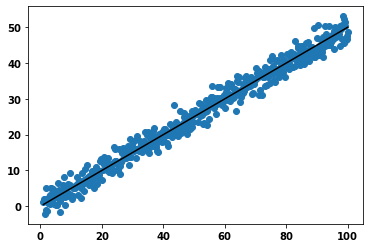

In [2]:
x = np.linspace(1,100,500)
y = 0.5*x 

sigma = 2

y_obs = y + dl.whitegaussnoise(x,sigma)

plt.plot(x,y,'k')
plt.scatter(x,y_obs)

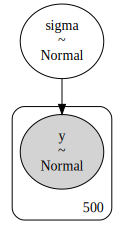

In [6]:
with pm.Model() as model:
    # Noise --------------------------------------------------------------
    sigma = pm.Normal('sigma', mu=0.7, sigma=2)

    # Likelihood ----------------------------------------------------------
    pm.Normal('y',mu = 0.5*x, sigma = sigma, observed = y_obs)

pm.model_to_graphviz(model) 

In [4]:
with model:
    trace = pm.sample(chains=2, cores=1, draws=500, tune= 100, return_inferencedata=False, progressbar = False)
    display(pm.summary(trace))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sigma]
Sampling 2 chains for 100 tune and 5_000 draw iterations (200 + 10_000 draws total) took 9 seconds.
The acceptance probability does not match the target. It is 0.9279956964793636, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9370978192925511, but should be close to 0.8. Try to increase the number of tuning steps.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,2.024,0.063,1.906,2.144,0.001,0.001,3613.0,4822.0,1.0


In [8]:
with model:
    trace = pm.sample(step = dive.randDelta2(sigma, 0.01, 1e-6), chains=2, cores=1, draws=500, tune= 100, return_inferencedata=False, progressbar = False)
    display(pm.summary(trace))

Sequential sampling (2 chains in 1 job)
randDelta2: [sigma]
Sampling 2 chains for 100 tune and 500 draw iterations (200 + 1_000 draws total) took 0 seconds.
C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\arviz\stats\diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
C:\Users\stephan\miniconda3\envs\pymc3\lib\site-packages\arviz\stats\diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,2.0,0.0,2.0,2.0,0.0,0.0,1000.0,1000.0,NaN
